In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

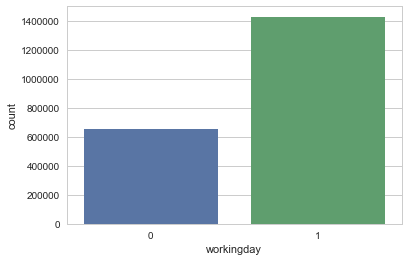

In [46]:
%matplotlib inline
df = pd.read_csv('bike_train.csv', parse_dates=['datetime'])

#일하는 날과 일하지 않는 날의 차이가 크다. BUt 일하는 날은 월화수목금, 일하지 않는날은 토일이기 때문에 유의하지는 않다고 본다.
pvwkday = df.pivot_table('count',['workingday'], aggfunc =np.sum)
sns.barplot(data = pvwkday,x =pvwkday.index,  y = 'count')

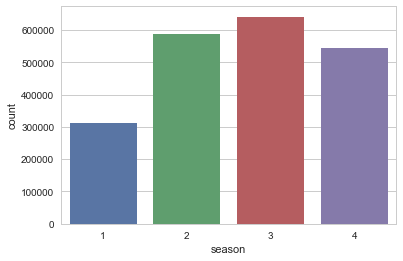

In [29]:
#가을에 빌리는 량이 가장 많다.
pvssn = df.pivot_table('count',['season'], aggfunc=np.sum)
sns.barplot(data = pvssn, x = pvssn.index, y = 'count')

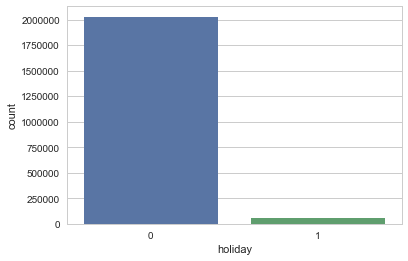

In [30]:
#마찬가지로 일하는 날에 대여량이 더많지만, 일하는날이 대부분이므로 다른 대책이 필요하다.
pvhlday = df.pivot_table('count',['holiday'],aggfunc=np.sum)
sns.barplot(data = pvhlday, x = pvhlday.index, y = 'count')

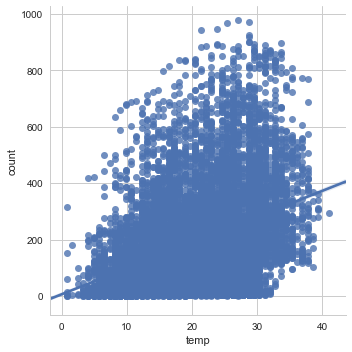

In [31]:
sns.lmplot(data=df, x='temp',y='count')

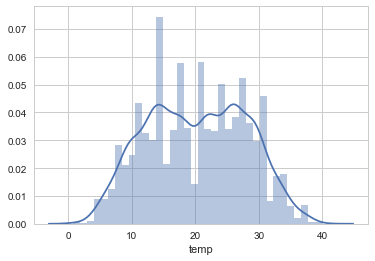

In [32]:
#정규분포로 보이지 않는다. QQ플롯을 그려볼 필요가 있을듯 하다. 
sns.distplot(df['temp'])

In [33]:
#데이터가 너무 세분화 되어서 그런가 하여, 소숫점을 빼보았다.
df['temp']= df['temp'].round(0)

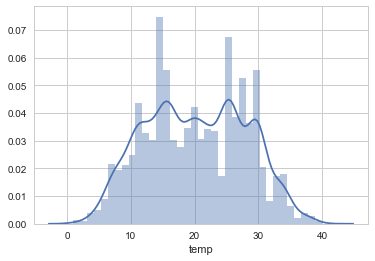

In [35]:
sns.distplot(df['temp'])

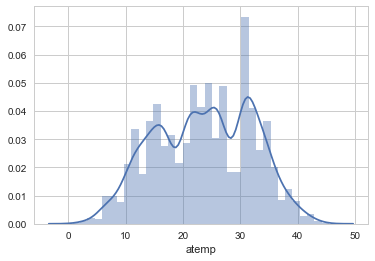

In [36]:
sns.distplot(df['atemp'])

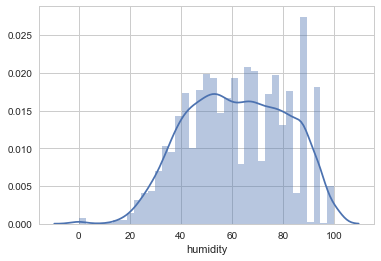

In [39]:
#0인 지점이 근처의 데이터에 비해 많다. 데이터가 나오지 않은 곳은 0으로 표현한 것으로 보인다. 또한 80이후에 0인 지점들이 많은것이 이상하다.
sns.distplot(df['humidity'])

In [87]:
#조금더 정규분포에 가까운듯 보인다.
high_humid = df[df['humidity']>10]

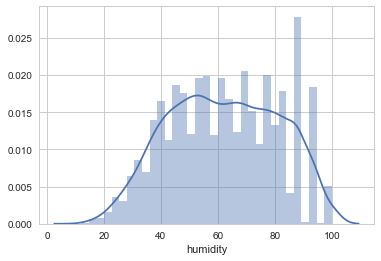

In [43]:
sns.distplot(high_humid['humidity'])

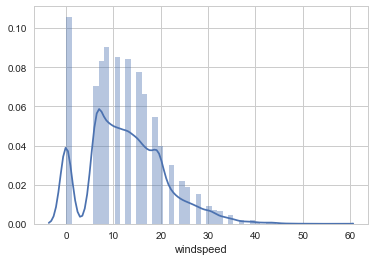

In [44]:
#데이터를 살펴보니 0인 데이터가 엄청나게 많은것을 볼수 있었다. 측정되지 않은 값들이 0으로 나타난것 같다. 전처리가 필요하다.
sns.distplot(df['windspeed'])

In [55]:
#시간과 요일별로도 유의한 차이가 있을 것이라고 생각했다.
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
#0이월요일
df['dayofweek'] = df['datetime'].dt.dayofweek

In [57]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,5
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,5
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,5
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,5


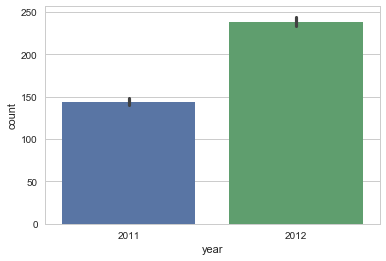

In [58]:
#년도별. 홍보가 더되어서 대여량이늘어난것으로 보인다. 
sns.barplot(data = df, x = 'year',y='count')

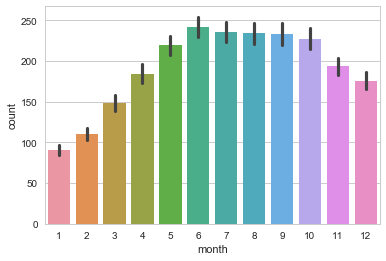

In [59]:
#아까전에 weather로 보았을때는 가을이 가장 많았는데, 뭔가 석연치 않다.(재확인의 필요성)
sns.barplot(data = df, x = 'month',y='count')

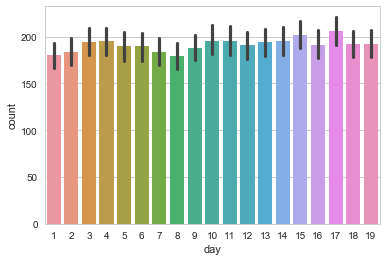

In [61]:
#일별로는 큰 유의성이 보이지 않는다.
sns.barplot(data = df, x= 'day', y ='count')

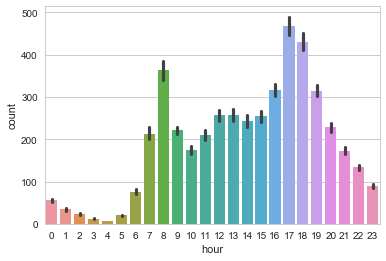

In [62]:
#출퇴근 시간대에 자전거 대여량이 유독 많아보인다.
sns.barplot(data=df, x='hour',y='count')

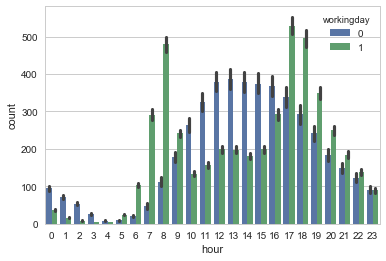

In [65]:
#일하는날과 일하지 않는날을 분리해보았다.
sns.barplot(data=df,x='hour',y='count', hue = 'workingday')

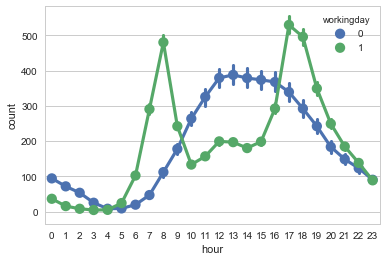

In [67]:
#이게 좀더 좋아보인다.
sns.pointplot(data=df,x='hour',y='count', hue='workingday')

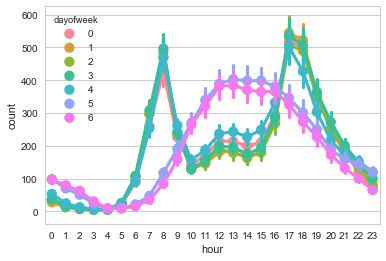

In [68]:
#월~일까지 plotting을 해보았다 토요일이 일요일보다 대여량이 근소하게 많아보인다. (평일에는 유의미를 찾기가 힘들다)
sns.pointplot(data=df,x='hour',y='count',hue='dayofweek')

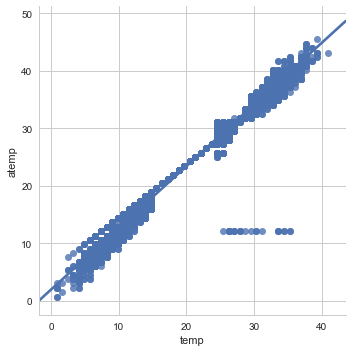

In [69]:
#체감온도와 온도는 아주큰 상관관계를 보인다. 밑에 데이터가 빠져있는 것들은 전처리를 해야할 것으로 보인다. (atemp값이 고정되어있는듯 하다)
sns.lmplot(data=df, x='temp', y='atemp')

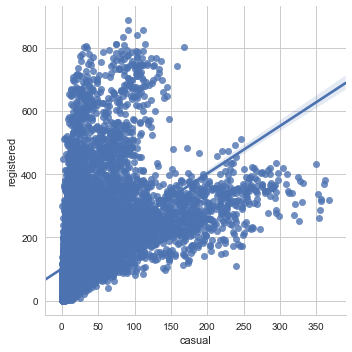

In [71]:
#예약과 대여량은 큰 상관관계가 보이지 않는다.
sns.lmplot(data=df, x='casual', y='registered')

In [76]:
#상관관계 지표. 눈여겨 봐야할 것은 (season과 month), (temp와 atemp)정도인듯하다. 
df.corr('pearson')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,-0.084427
